# Removing outliers from time series data

This notebook is a basic introduction to a specific aspect of time series data preparation; viz., removing outliers and replacing them with sensible values.

## 0 Setup

if (!require("pacman")) install.packages("pacman")
pacman::p_load("forecast", "pracma", "TSA", "VIM", "zoo")

library(forecast)
library(pracma)
library(TSA)
library(VIM)
library(zoo)

## 1 Visualization

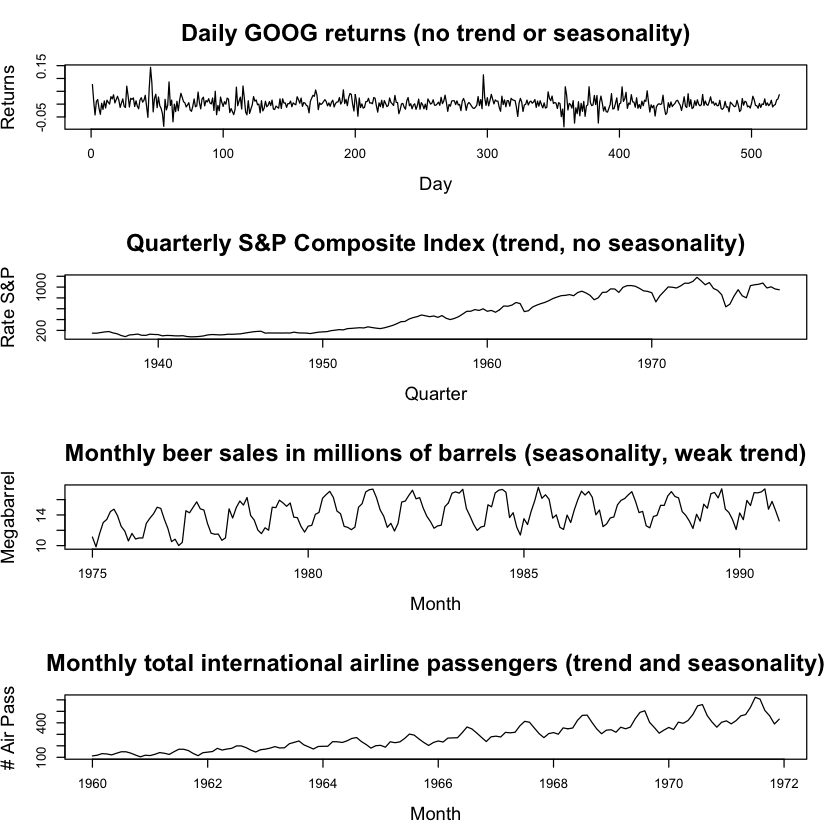

In [8]:
data(list = c("airpass", "SP", "google", "beersales"))
par(mfrow = c(4, 1), cex.main = 1.8, cex.lab = 1.4)
plot(google, main = "Daily GOOG returns (no trend or seasonality)",
     xlab = "Day", ylab = "Returns")
plot(SP, main = "Quarterly S&P Composite Index (trend, no seasonality)",
     xlab = "Quarter", ylab = "Rate S&P")
plot(beersales, main = "Monthly beer sales in millions of barrels (seasonality, weak trend)",
     xlab = "Month", ylab = "Megabarrel")
plot(airpass, main = "Monthly total international airline passengers (trend and seasonality)",
     xlab = "Month", ylab = "# Air Pass")

## 2 Introduce outliers

### 2.1 Daily GOOG returns

In [132]:
google.short <- subset(google, start=1, end=60)
google.times <- as.numeric(time(google.short))
google.lm <- lm(google.short ~ google.times)

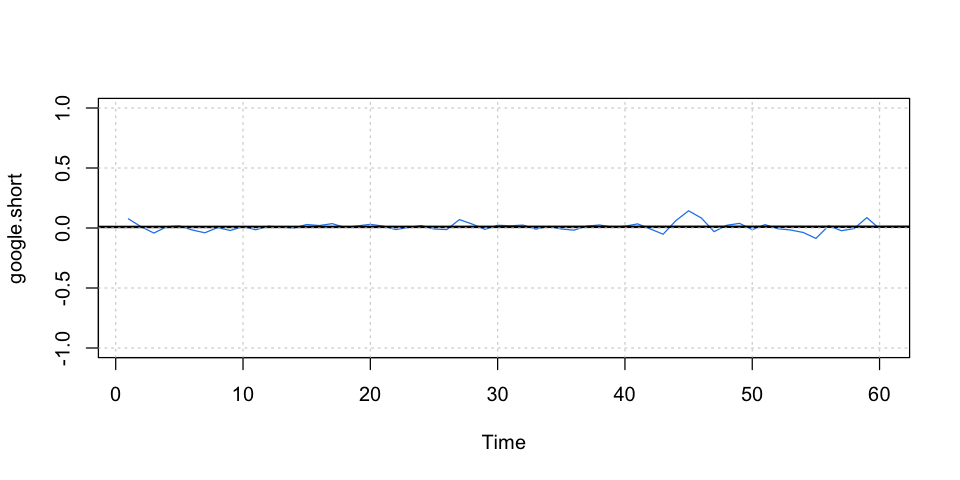

In [232]:
options(repr.plot.width=8, repr.plot.height=4)
plot(google.short, col="dodgerblue2", ylim=c(-1, 1))
abline(google.lm, lwd=2, col="black")
grid()

In [224]:
writeLines(paste("length(google.short) =", length(google.short)))

# Introduce outliers
google.with.outliers <- google.short
google.with.outliers[56] <- 10

# Linear model
google.with.outliers.lm <- lm(google.with.outliers ~ google.times)

length(google.short) = 60


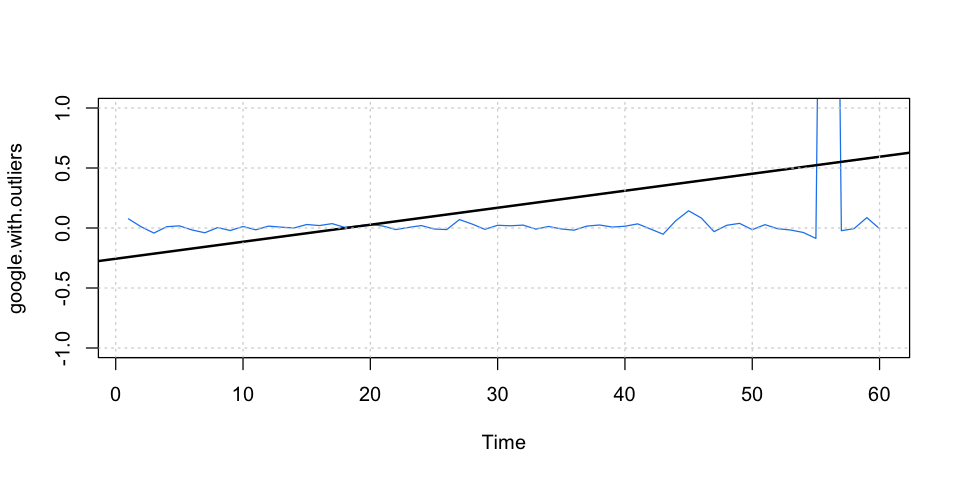

In [233]:
options(repr.plot.width=8, repr.plot.height=4)
plot(google.with.outliers, col="dodgerblue2", ylim=c(-1, 1))
abline(google.with.outliers.lm, lwd=2, col="black")
grid()

### 2.2 S&P

In [196]:
SP.times <- as.numeric(time(SP))
SP.lm <- lm(SP ~ SP.times)
SP.lm


Call:
lm(formula = SP ~ SP.times)

Coefficients:
(Intercept)     SP.times  
  -53076.46        27.38  


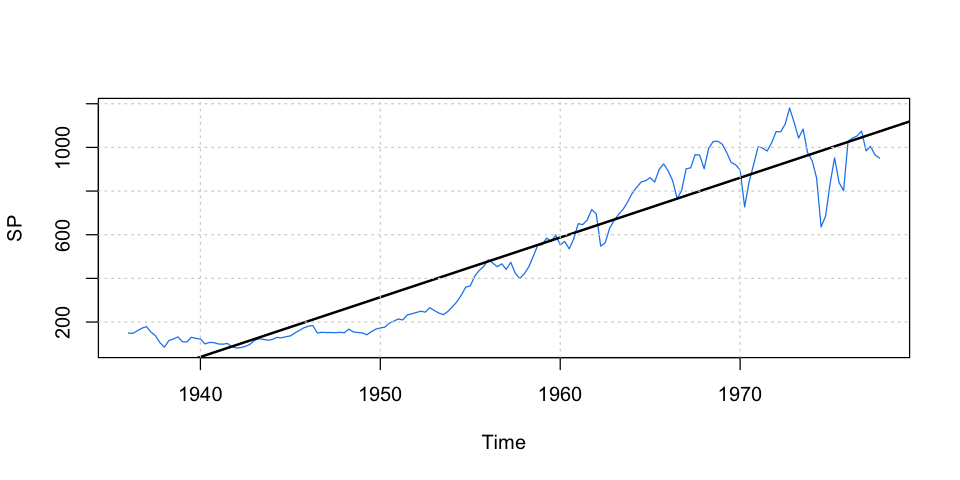

In [160]:
options(repr.plot.width=8, repr.plot.height=4)
plot(SP, col="dodgerblue2")
abline(SP.lm, lwd=2, col="black")
grid()

In [194]:
writeLines(paste("length(SP) =", length(SP)))

# Introduce outliers
SP.with.outliers <- SP
SP.with.outliers[113] <- 0
SP.with.outliers[145] <- 0
SP.with.outliers[161] <- 0

# Linear model
SP.with.outliers.lm <- lm(SP.with.outliers ~ SP.times)
SP.with.outliers.lm

length(SP) = 168



Call:
lm(formula = SP.with.outliers ~ SP.times)

Coefficients:
(Intercept)     SP.times  
   -49805.4         25.7  


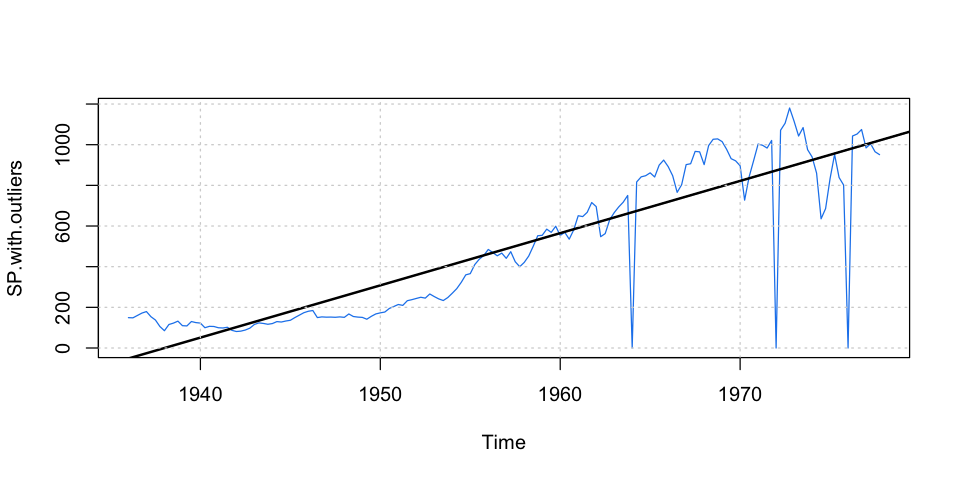

In [193]:
options(repr.plot.width=8, repr.plot.height=4)
plot(SP.with.outliers, col="dodgerblue2")
abline(SP.with.outliers.lm, lwd=2, col="black")
grid()

## 3 Identify outliers

In [262]:
# Run the Hampel filter
SP.hampel <- hampel(SP.with.outliers, 5, 3)

# Right now we're just identifying. We'll impute in a bit.
SP.hampel$ind

[1]  42  50 113 145 161

In [264]:
SP.hampel.outlier.times <- list()
SP.hampel.outlier.values <- list()

# Yes, I need to learn how to do functional programming in R. :D
i <- 1
for (ind in SP.hampel$ind) {
    SP.hampel.outlier.times[[i]] <- SP.times[ind]
    SP.hampel.outlier.values[[i]] <- SP.with.outliers[ind]
    i <- i + 1
}

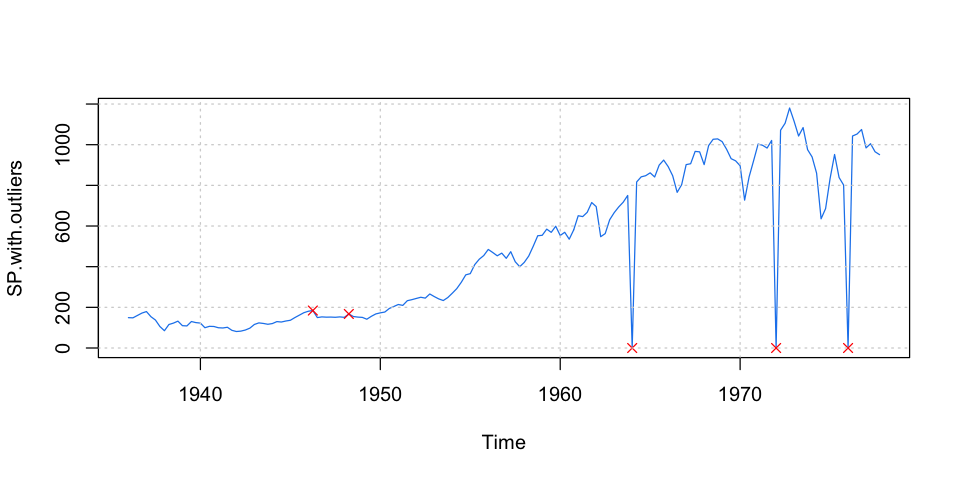

In [265]:
options(repr.plot.width=8, repr.plot.height=4)
plot(SP.with.outliers, col="dodgerblue2")
points(SP.hampel.outlier.times, SP.hampel.outlier.values, pch=4, col="red")
grid()